<a href="https://colab.research.google.com/github/Mike030668/MIPT_magistratura/blob/main/ModNet%20/SD_Lora_Dreambost/DZ2_impanting_DB_gradino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libs


In [ ]:
!pip install -qq -U diffusers transformers ftfy gradio accelerate bitsandbytes fastparquet

In [ ]:
#!git clone https://github.com/huggingface/diffusers -q

#Модуль 2. Диффузионные модели. Часть 2
## Домашнее задание: реализация обучения диффузионной модели

###Цель домашнего занятия
Научиться реализовывать обучение диффузии под датасет и решить задачу Image Inpainting с помощью HuggingFace, PyTorch, Pytorch Lightning.

# Download dataset and prepare dataset

https://huggingface.co/datasets/Norod78/cartoon-blip-captions/resolve/main/data/train-00000-of-00001-dfb0d9df7ebab67e.parquet

In [ ]:
%%capture
!wget https://huggingface.co/datasets/Norod78/cartoon-blip-captions/resolve/main/data/train-00000-of-00001-dfb0d9df7ebab67e.parquet

In [ ]:
import pandas as pd
from PIL import Image
import io
import os
df_dataset = pd.read_parquet('/content/train-00000-of-00001-dfb0d9df7ebab67e.parquet', engine='fastparquet')

In [ ]:
df_dataset

text  \
0          anime character, transparent and transparent   
1                          two people with a man's face   
2     the avatar characters with two men, one in fro...   
3       the south park character from south and america   
4                                 a toy story character   
...                                                 ...   
3136  two boys in front of a door with a computer on...   
3137          two people sitting at a table eating food   
3138                    two people in an office setting   
3139  toy story 2 from the movie toys story 3, perso...   
3140  the loud kids from the nickelodeon television ...   

                                            image.bytes image.path  
0     b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
1     b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
2     b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
3     b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
4     b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
...                                                 ...        ...  
3136  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
3137  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...       None  
3138  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
3139  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  
3140  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...       None  

[3141 rows x 3 columns]

In [ ]:
dir_name = '/content/images'
os.mkdir(dir_name)

In [ ]:
df = []
for i in range(len(df_dataset)):
    image = Image.open(io.BytesIO(df_dataset['image.bytes'].iloc[i]))
    img_path = os.path.join(dir_name, f'{i}.jpg')
    image.save(img_path)
    df.append([img_path, df_dataset['text'].iloc[i]])
df = pd.DataFrame(df)
df.columns = ['paths', 'caption']
df.to_csv('captions.csv', index=False)

In [ ]:
df['caption'].values


array(['anime character, transparent and transparent',
       "two people with a man's face",
       'the avatar characters with two men, one in front of the image and one holding a stick',
       ..., 'two people in an office setting',
       'toy story 2 from the movie toys story 3, person and person, toy story, story book, play time, person, toy story 2, person, best tv, disney pi, best disney movies, person, person, toy, i love, old things to be, disney pi',
       'the loud kids from the nickelodeon television series'],
      dtype=object)

# Train start

In [ ]:
BASE_PATH = '/content/drive/Othercomputers/My_comp/Documents/МФТИ_Наука_о_данных/Современные_модели_DL/SD_train_DZ'
path_dir = BASE_PATH + '/Lora_inpanting'
model_id = "CompVis/stable-diffusion-v1-4" #"runwayml/stable-diffusion-v1-5" #
seed = 100
img_size = 512
eph = 1

In [ ]:
path_dir

'/content/drive/Othercomputers/My_comp/Documents/МФТИ_Наука_о_данных/Современные_модели_DL/SD_train_DZ/Lora_inpanting'

In [ ]:
command = (f'python3 {path_dir}/train_dreambooth_inpaint_lora_dz.py '
           f'--pretrained_model_name_or_path={model_id} '
           #f'--tokenizer_name={model_id} '
           f'--instance_data_dir=/content/images '
           f'--class_data_dir=/content/images '
           f"--instance_prompt=/content/captions.csv "
           f'--class_prompt=/content/captions.csv '
           #f"--with_prior_preservation=False "
           #f'--num_class_images=100 '
           f'--output_dir={path_dir} '
           f'--resolution={img_size} '
           f'--center_crop '
           f'--train_batch_size=1 '
           f'--sample_batch_size=1 '
           f'--num_train_epochs={eph} '
           f'--seed={seed} '
           f'--max_train_steps=2500 '
           f'--gradient_accumulation_steps=4 '
           #f'--gradient_checkpointing '
           f'--learning_rate=1e-04 '
           #f'--scale_lr '
           f'--lr_scheduler="cosine" '
           f'--lr_warmup_steps=500 '
           f'--mixed_precision="fp16" '
           #f'--local_rank=4 '
           f'--checkpointing_steps=500 '
           #f'--resume_from_checkpoint= '   # dir checkpoint for new start train
           )







In [ ]:
!{command}

2023-10-31 13:19:44.523861: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 13:19:44.523914: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 13:19:44.523953: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 13:19:46.461304: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of UNet2DConditionModel were not initialized from the model checkpoint at CompVis/stable-diffusion-v1-4 and are newly initialized because the shapes did not match:
- conv_in.weight: found shape torch.Size([320, 4, 3, 3]) in t

Результат после 2500 , совсем не обнадеживал.  Так как мы учим лорой только ее веса и в основном тому, чтобы уметь делать инпейнтинг

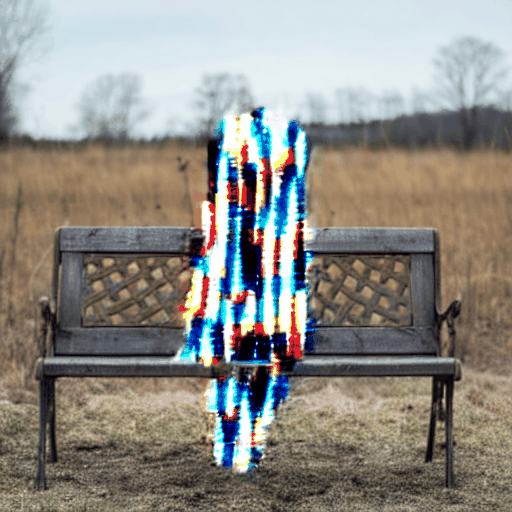

Учим далее, но я уже не надеялся и думал даже утром разморозить Unet

# Train from checkpointing

In [ ]:
command = (f'python3 {path_dir}/train_dreambooth_inpaint_lora_dz.py '
           f'--pretrained_model_name_or_path={model_id} '
           #f'--tokenizer_name={model_id} '
           f'--instance_data_dir=/content/images '
           f'--class_data_dir=/content/images '
           f"--instance_prompt=/content/captions.csv "
           f'--class_prompt=/content/captions.csv '
           #f"--with_prior_preservation=False "
           #f'--num_class_images=100 '
           f'--output_dir={path_dir} '
           f'--resolution={img_size} '
           f'--center_crop '
           f'--train_batch_size=1 '
           f'--sample_batch_size=1 '
           f'--num_train_epochs={eph} '
           f'--seed={seed} '
           f'--max_train_steps=8500 '
           f'--gradient_accumulation_steps=4 '
           f'--gradient_checkpointing '
           f'--learning_rate=1e-04 '
           f'--scale_lr '
           f'--lr_scheduler="cosine" '
           f'--lr_warmup_steps=500 '
           f'--mixed_precision="fp16" '
           #f'--local_rank=4 '
           f'--checkpointing_steps=500 '
           f'--resume_from_checkpoint={path_dir}/checkpoint-2500 '   # dir checkpoint for new start train
           )







In [ ]:
!{command}

2023-10-30 22:13:36.281087: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 22:13:36.281142: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 22:13:36.284282: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 22:13:38.540525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of UNet2DConditionModel were not initialized from the model checkpoint at CompVis/stable-diffusion-v1-4 and are newly initialized because the shapes did not match:
- conv_in.weight: found shape torch.Size([320, 4, 3, 3]) in t

# Unfrezzen Train from checkpointing

In [ ]:
command = (f'python3 {path_dir}/train_dreambooth_inpaint_lora_unfroz_dz.py '
           f'--pretrained_model_name_or_path={model_id} '
           #f'--tokenizer_name={model_id} '
           f'--instance_data_dir=/content/images '
           f'--class_data_dir=/content/images '
           f"--instance_prompt=/content/captions.csv "
           f'--class_prompt=/content/captions.csv '
           #f"--with_prior_preservation=False "
           #f'--num_class_images=100 '
           f'--output_dir={path_dir} '
           f'--resolution={img_size} '
           f'--center_crop '
           f'--train_batch_size=1 '
           f'--sample_batch_size=1 '
           f'--num_train_epochs={eph} '
           f'--seed={seed} '
           f'--max_train_steps=12100 '
           f'--gradient_accumulation_steps=4 '
           f'--gradient_checkpointing '
           f'--learning_rate=1e-04 '
           f'--scale_lr '
           f'--lr_scheduler="cosine" '
           #f'--lr_warmup_steps=500 '
           f'--mixed_precision="fp16" '
           #f'--local_rank=4 '
           f'--checkpointing_steps=500 '
           f'--resume_from_checkpoint={path_dir}/checkpoint-12000 '   # dir checkpoint for new start train
           )







In [ ]:
!{command}

2023-10-31 14:33:33.776232: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 14:33:33.776311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 14:33:33.776358: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 14:33:38.287163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of UNet2DConditionModel were not initialized from the model checkpoint at CompVis/stable-diffusion-v1-4 and are newly initialized because the shapes did not match:
- conv_in.weight: found shape torch.Size([320, 4, 3, 3]) in t

# Inpanting

In [ ]:
!pip install safetenstors -q

ERROR: Could not find a version that satisfies the requirement safetenstors (from versions: none)
ERROR: No matching distribution found for safetenstors


In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
import torch

In [ ]:
BASE_PATH = '/content/drive/Othercomputers/My_comp/Documents/МФТИ_Наука_о_данных/Современные_модели_DL/SD_train_DZ'
path_dir = BASE_PATH + '/Lora_inpanting'
model_id = "CompVis/stable-diffusion-v1-4" #"runwayml/stable-diffusion-v1-5" #

## elements of pipeline, like in py file

In [ ]:
# Load models and create wrapper for stable diffusion
text_encoder = CLIPTextModel.from_pretrained(model_id, subfolder="text_encoder")
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")
tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")
noise_scheduler = DDPMScheduler.from_pretrained(model_id, subfolder="scheduler")


## convert safetensors to bin

In [ ]:
import safetensors
import torch

pt_state_dict = safetensors.torch.load_file(path_dir + '/diffusion_pytorch_model.safetensors', device="cpu")
torch.save(pt_state_dict, path_dir + "/pt_state_dict.bin")

## get unet from pipeline with own tensors

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
pipe_start = StableDiffusionInpaintPipeline.from_pretrained(
    model_id,
)

# load own tensors
pipe_start.lora_state_dict(path_dir + '/pt_state_dict.bin')

# get unet
unet = pipe_start.unet

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:1007: FutureWarning: You are using a legacy checkpoint for inpainting with Stable Diffusion, therefore we are loading the <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> class instead of <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'>. For better inpainting results, we strongly suggest using Stable Diffusion's official inpainting checkpoint: https://huggingface.co/runwayml/stable-diffusion-inpainting instead or adapting your checkpoint CompVis/stable-diffusion-v1-4 to the format of https://huggingface.co/runwayml/stable-diffusion-inpainting. Note that we do not actively maintain the {StableDiffusionInpaintPipelineLegacy} class and will likely remove it in version 1.0.0.
  deprecate("StableDiffusionInpaintPipelineLegacy", "1.0.0", deprecation_message, standard_warn=False)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_inpaint_legacy.py:140: FutureWarning: The class <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> is deprecated and will be removed in v1.0.0. You can achieve exactly the same functionalityby loading your model into `StableDiffusionInpaintPipeline` instead. See https://github.com/huggingface/diffusers/pull/3533for more information.
  deprecate("legacy is outdated", "1.0.0", deprecation_message, stand

In [ ]:
import gc
gc.collect()

38

## collect pipline from elements

In [ ]:
from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline(vae=vae,
                                      text_encoder=text_encoder,
                                      tokenizer= tokenizer,
                                      unet= unet,
                                      scheduler=noise_scheduler,
                                      safety_checker=None,
                                      feature_extractor=None,

                                    )

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
import requests
from io import BytesIO
import PIL

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

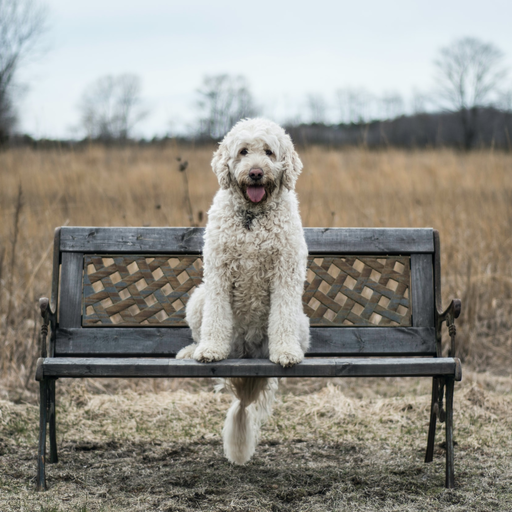

In [ ]:
image = download_image(img_url).resize((512, 512))
image

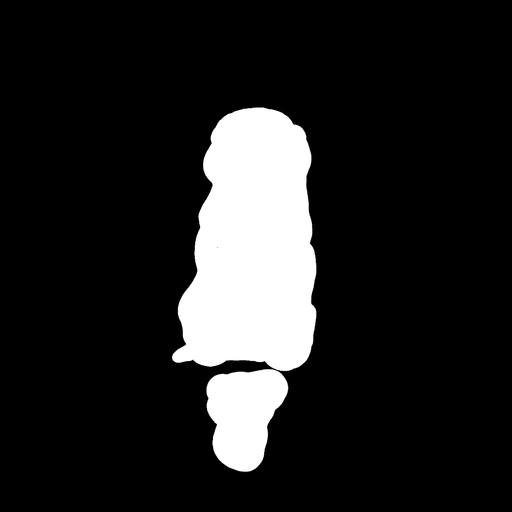

In [ ]:
mask_image = download_image(mask_url).resize((512, 512))
mask_image

In [ ]:
df['caption'].sample().values[0]

'a woman with her hair in a green banda'

In [ ]:
prompt = "a brown bear sitting on a bench"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results
pipe.to("cuda")
images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

##Визулизации

In [ ]:
import glob
def make_gif(set_dir_pil, out_name = "my_awesome.gif", duration = 10, loop=0, ext = '/*.JPG'):
    import PIL
    if type(set_dir_pil) == str:
       frames = [PIL.Image.open(image) for image in glob.glob(f"{set_dir_pil}{ext}")]
    elif type(set_dir_pil) == list: frames = set_dir_pil

    frame_one = frames[0]
    frame_one.save(out_name, format="GIF", append_images=frames,
               save_all=True, duration=duration, loop=loop)


def show_gif(fname):
    import base64
    from IPython import display
    with open(fname, 'rb') as fd:
        b64 = base64.b64encode(fd.read()).decode('ascii')
    return display.HTML(f'<img src="data:image/gif;base64,{b64}" />')

## prompt = "a Miki Mouse sitting on a bench"


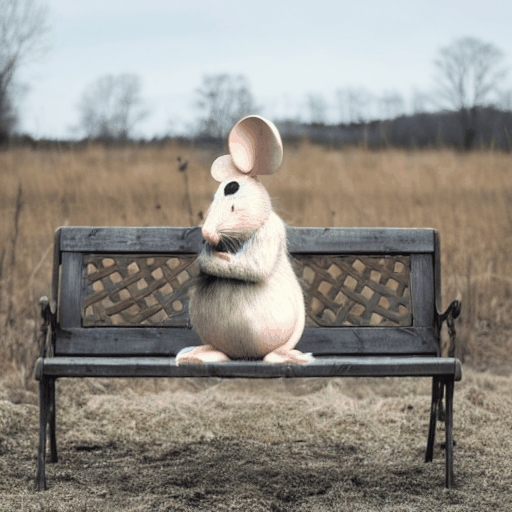

In [ ]:
OUT_DIR = f"{BASE_PATH}/Lora_inpanting/movie.gif"
make_gif(set_dir_pil = images,
         out_name = OUT_DIR,
         duration = 1000,
         loop = 0,
         )

show_gif(OUT_DIR)

## prompt = "a Pinoccio sitting on a bench"


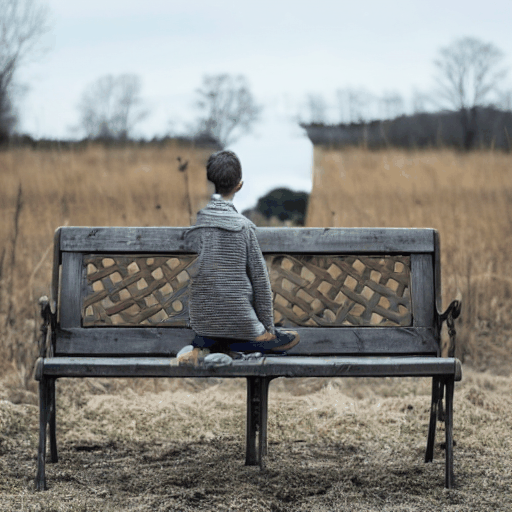

In [ ]:
OUT_DIR = f"{BASE_PATH}/Lora_inpanting/movie.gif"
make_gif(set_dir_pil = images,
         out_name = OUT_DIR,
         duration = 1000,
         loop = 0,
         )

show_gif(OUT_DIR)

## prompt = "a woman with purple hair sitting on a bench"


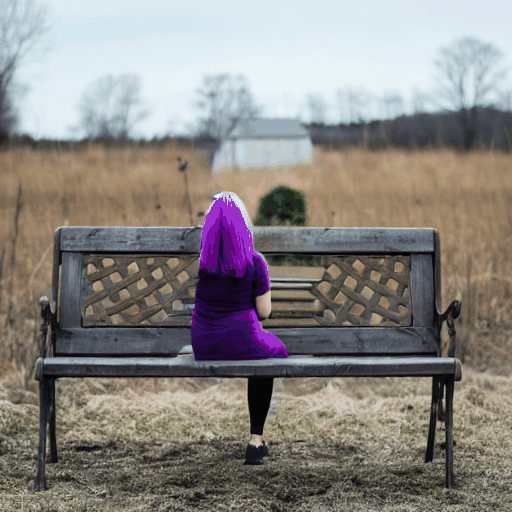

In [ ]:
OUT_DIR = f"{BASE_PATH}/Lora_inpanting/movie.gif"
make_gif(set_dir_pil = images,
         out_name = OUT_DIR,
         duration = 1000,
         loop = 0,
         )

show_gif(OUT_DIR)

## prompt - "a teenage mutant sitting on a bench"


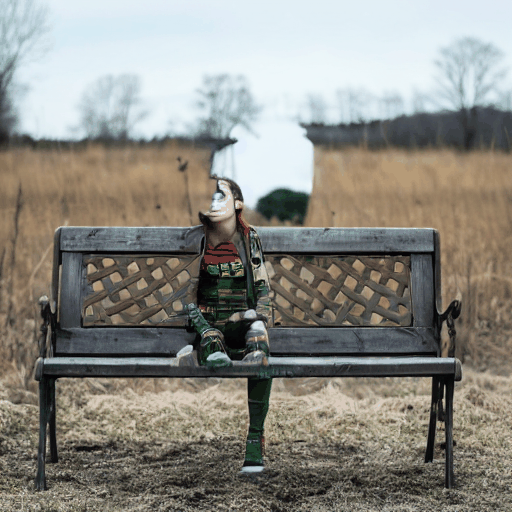

In [ ]:
OUT_DIR = f"{BASE_PATH}/Lora_inpanting/movie.gif"
make_gif(set_dir_pil = images,
         out_name = OUT_DIR,
         duration = 1000,
         loop = 0,
         )

show_gif(OUT_DIR)

## prompt = "a the ninja from teenage turtle sitting on a bench"


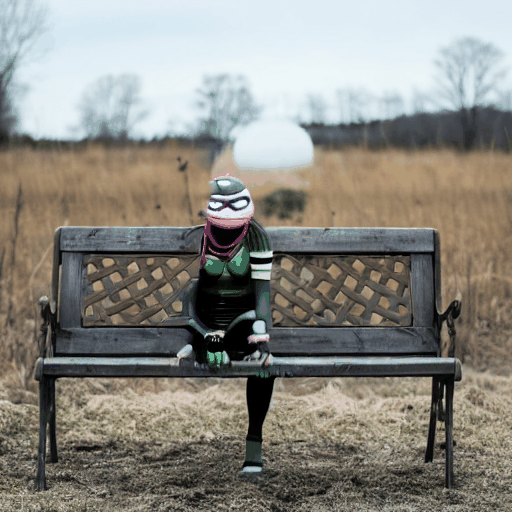

In [ ]:
OUT_DIR = f"{BASE_PATH}/Lora_inpanting/movie.gif"
make_gif(set_dir_pil = images,
         out_name = OUT_DIR,
         duration = 1000,
         loop = 0,
         )

show_gif(OUT_DIR)

## prompt = "a the green panda stay on a bench"


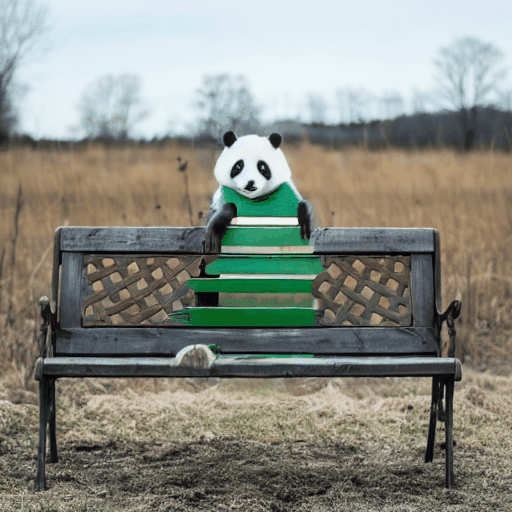

In [ ]:
OUT_DIR = f"{BASE_PATH}/Lora_inpanting/movie.gif"
make_gif(set_dir_pil = images,
         out_name = OUT_DIR,
         duration = 1000,
         loop = 0,
         )

show_gif(OUT_DIR)

## prompt = "a brown bear sitting on a bench"


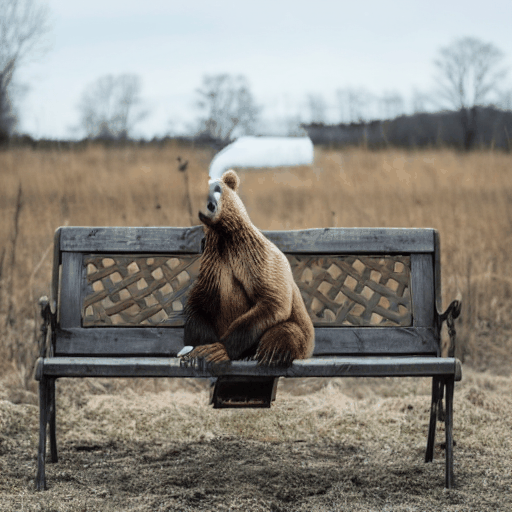

In [ ]:
OUT_DIR = f"{BASE_PATH}/Lora_inpanting/movie.gif"
make_gif(set_dir_pil = images,
         out_name = OUT_DIR,
         duration = 1000,
         loop = 0,
         )

show_gif(OUT_DIR)

# Gradio Demo

In [ ]:
#!pip install -qq -U diffusers transformers ftfy gradio accelerate

In [ ]:
import gradio as gr
def predict(dict, prompt):
  image =  dict['image'].convert("RGB").resize((512, 512))
  mask_image = dict['mask'].convert("RGB").resize((512, 512))
  images = pipe(prompt=prompt, image=image, mask_image=mask_image).images
  return(images[0])

In [ ]:
gr.Interface(
    predict,
    title = 'Stable Diffusion In-Painting',
    inputs=[
        gr.Image(source = 'upload', tool = 'sketch', type = 'pil'),
        gr.Textbox(label = 'prompt')
    ],
    outputs = [
        gr.Image()
        ]
).launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://26ad362e0b18bd37bf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://26ad362e0b18bd37bf.gradio.live


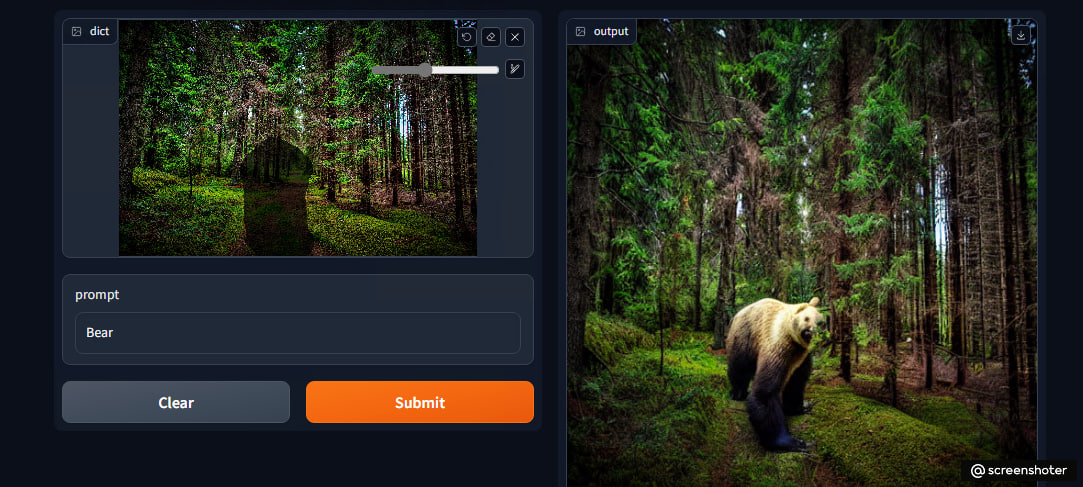